# Math Question Answer Verification Competition

## Starter Code

In [1]:
# fetch data from drive
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Borrowed from [official Unsloth implementation](https://colab.research.google.com/drive/1Ys44kVvmeZtnICzWz0xgpRnrIOjZAuxp?usp=sharing#scrollTo=MKX_XKs_BNZR)

In [2]:
# %%capture
# This cell will take time
!pip install unsloth
# Also get the latest nightly Unsloth!
!pip uninstall unsloth -y && pip install --upgrade --no-cache-dir "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.9/163.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.9/310.9 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 101.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 94.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.8/109.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Found existing installation: unsloth 2024.11.7
Uninstalling unsloth-2024.11.7:
  Successfully uninstalled unsloth-2024.11.7
  Cloning https://github.com/unslothai/unsloth.git to /tmp/pip-install-6shhk5ar/unsloth_08d3614fa998420f8a70f8f9c56c78a7
  Running command git clone --filter=blob:none --quiet https://github.com/unslothai/unsloth.git /tmp/pip-install-6shhk5ar/unsloth_08d3614fa998420f8a70f8f9c56c78a7
  Resolved https://github.com/unslothai/unsloth.git to commit f26d4e739ed507de7a9088da53d10fd02f58d160
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for unsloth: filename=unsloth-2024.11.7-py3-none-any.whl size=163138 sha256=ec68d263465a70c6f978c094bb24acfd45769c29b24f4410e2bb4488571e299b
  Stored in directory: /tmp/pip-ephem-wheel-cache-chsldt5k/wheels/ed/d4/e9/76fb290ee3df0a5fc21ce5c2c788e29e9607a2353d8342fd0d
Successfully built unsloth


In [3]:
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'

In [4]:
from unsloth import FastLanguageModel
import torch
max_seq_length = 2048 # Choose any
dtype = None # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
load_in_4bit = True # Use 4bit quantization to reduce memory usage. Can be False.


🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


In [5]:
model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Meta-Llama-3.1-8B",
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
)

==((====))==  Unsloth 2024.11.7: Fast Llama patching. Transformers = 4.46.2.
   \\   /|    GPU: NVIDIA A100-SXM4-40GB. Max memory: 39.564 GB. Platform = Linux.
O^O/ \_/ \    Pytorch: 2.5.1+cu121. CUDA = 8.0. CUDA Toolkit = 12.1.
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.28.post3. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/5.70G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/230 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/50.6k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

## Load model and wrap with LoRA adapters

In [6]:
model = FastLanguageModel.get_peft_model(
    model,
    r = 64,  # Increase rank for better capacity
    lora_alpha = 16,  # Adjust alpha to maintain balance
    target_modules = [
        "q_proj", "k_proj", "v_proj", "o_proj",
        "gate_proj", "up_proj", "down_proj"
    ],
    lora_dropout = 0.1,  # Introduce dropout to prevent overfitting
    bias = "lora_only",  # Adjust biases in LoRA layers
    use_gradient_checkpointing = "unsloth",
    random_state = 3407,
    use_rslora = True,  # Keep rank stabilization enabled
    loftq_config = None
)

Unsloth: Dropout = 0 is supported for fast patching. You are using dropout = 0.1.
Unsloth will patch all other layers, except LoRA matrices, causing a performance hit.
Unsloth: bias = `none` is supported for fast patching. You are using bias = lora_only.
Unsloth will patch all other layers, except LoRA matrices, causing a performance hit.
Unsloth 2024.11.7 patched 32 layers with 0 QKV layers, 0 O layers and 0 MLP layers.


## Competition dataset

In [7]:
# download and load competition dataset

from datasets import load_dataset
dataset = load_dataset("ad6398/nyu-dl-teach-maths-comp")
# print and see dataset
dataset

README.md:   0%|          | 0.00/2.09k [00:00<?, ?B/s]

train-00000-of-00002.parquet:   0%|          | 0.00/195M [00:00<?, ?B/s]

train-00001-of-00002.parquet:   0%|          | 0.00/195M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/3.65M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1000000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['question', 'is_correct', 'answer', 'solution'],
        num_rows: 1000000
    })
    test: Dataset({
        features: ['question', 'is_correct', 'answer', 'solution'],
        num_rows: 10000
    })
})

In [8]:
prompt = """You are a mathematics expert tasked with verifying if the given answer is correct.
Follow these steps:
1. Carefully read the question
2. Solve the problem independently
3. Compare your solution with the given answer
4. Check for mathematical accuracy and precision
5. Respond with 'True' only if the answer is exactly correct, otherwise 'False'

Question:
{}

Given Answer:
{}

Your Solution:
{}

Verification Result:
{}"""

EOS_TOKEN = tokenizer.eos_token # Must add EOS_TOKEN
def formatting_prompts_func(examples):
    question = examples["question"]
    ans = examples["answer"]
    solution = examples["solution"]
    output = examples["is_correct"]
    texts = []
    for q, a, s, o in zip(question, ans, solution, output):
        text = prompt.format(q, a, s, o) + EOS_TOKEN
        texts.append(text)
    return { "text" : texts }




In [9]:
# Process the training dataset and generate prompt for each datapoint

train_dataset = dataset['train'].map(formatting_prompts_func, batched = True,)

Map:   0%|          | 0/1000000 [00:00<?, ? examples/s]

In [10]:
#print a smaple training example
train_dataset['text'][0]

"You are a mathematics expert tasked with verifying if the given answer is correct.\nFollow these steps:\n1. Carefully read the question\n2. Solve the problem independently\n3. Compare your solution with the given answer\n4. Check for mathematical accuracy and precision\n5. Respond with 'True' only if the answer is exactly correct, otherwise 'False'\n\nQuestion:\nWhat is the radius of the circle inscribed in triangle $ABC$ if $AB = 22, AC=12,$ and $BC=14$? Express your answer in simplest radical form.\n\nGiven Answer:\n3.16227766016838\n\nYour Solution:\nThe circle is inscribed in a triangle, and we know the sides of the triangle.\nTo use the inradius formula, we need to know the area of the triangle.\nWe can use Heron's formula to calculate the area.\n<llm-code>\nimport math\nfrom sympy import *\n\nAB, AC, BC = 22, 12, 14\n\n# Calculate the semiperimeter and area using Heron's formula\ns = (AB + AC + BC) / 2\nK = sqrt(s * (s - AB) * (s - AC) * (s - BC))\n\nprint(K)\n</llm-code>\n<llm-

## SFT

In [12]:
from trl import SFTTrainer
from transformers import TrainingArguments
from unsloth import is_bfloat16_supported

train_dataset_subset = train_dataset.select(range(30000))

# Modify training arguments to run for 1 epoch
training_args = TrainingArguments(
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 4,
        warmup_steps = 100,
        num_train_epochs = 1,  # Set to 1 full epoch
        learning_rate = 2e-4,
        fp16 = not is_bfloat16_supported(),
        bf16 = is_bfloat16_supported(),
        logging_steps = 50,    # Increased logging steps since we're running longer
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        report_to = "none",
        output_dir = "/content/drive/MyDrive/LLama",
        save_strategy = "steps",
        save_steps = 500,
    )

# Create trainer with subset
trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = train_dataset_subset,  # Use the subset instead
    dataset_text_field = "text",
    max_seq_length = max_seq_length,
    dataset_num_proc = 4,
    packing = False,
    args = training_args
)

In [ ]:
trainer_stats = trainer.train()

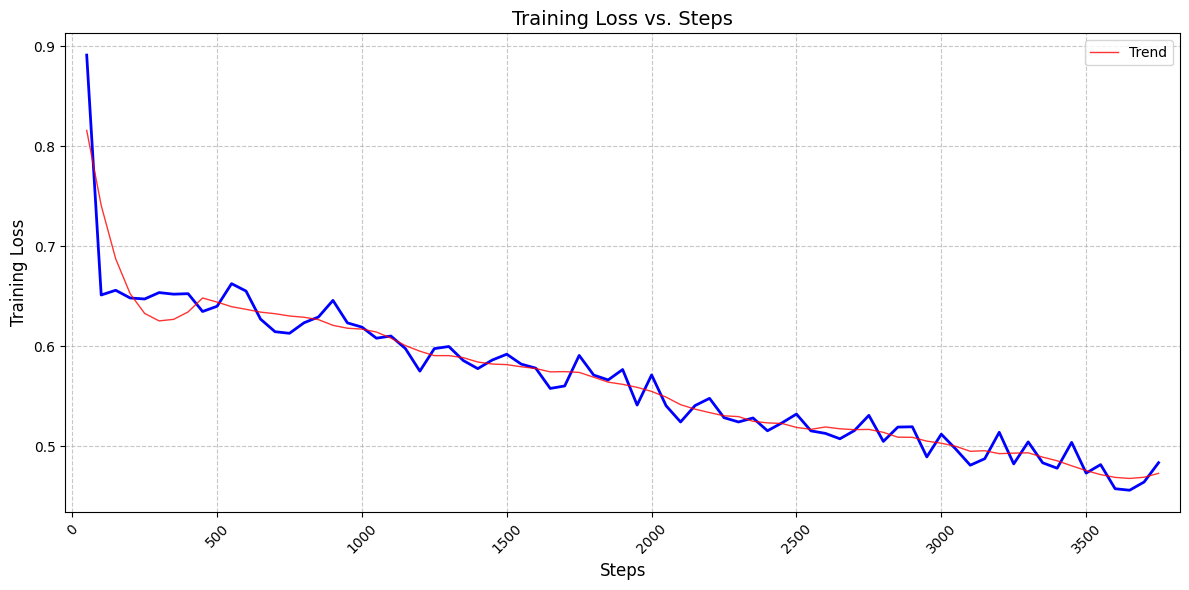

In [1]:
import matplotlib.pyplot as plt

# Extract steps and loss values from your training output
steps = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000,
         1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1650, 1700, 1750, 1800, 1850,
         1900, 1950, 2000, 2050, 2100, 2150, 2200, 2250, 2300, 2350, 2400, 2450, 2500, 2550, 2600, 2650, 2700,
         2750, 2800, 2850, 2900, 2950, 3000, 3050, 3100, 3150, 3200, 3250, 3300, 3350, 3400, 3450, 3500, 3550,
         3600, 3650, 3700, 3750]

losses = [0.891000, 0.651300, 0.656000, 0.648300, 0.647300, 0.653700, 0.652100, 0.652600, 0.634800, 0.640000,
          0.662600, 0.655200, 0.627200, 0.614600, 0.613000, 0.623500, 0.629300, 0.645900, 0.623400, 0.619200,
          0.608100, 0.610300, 0.597800, 0.575200, 0.597700, 0.599800, 0.585800, 0.577700, 0.586300, 0.592100,
          0.582200, 0.578200, 0.557900, 0.560400, 0.590900, 0.571300, 0.566400, 0.576800, 0.541300, 0.571400,
          0.540600, 0.524400, 0.540800, 0.548000, 0.528700, 0.524400, 0.528400, 0.515600, 0.523500, 0.532300,
          0.515500, 0.513000, 0.507600, 0.515800, 0.531000, 0.505000, 0.519300, 0.519600, 0.489500, 0.512200,
          0.497300, 0.481200, 0.487700, 0.514100, 0.482500, 0.504500, 0.483600, 0.478200, 0.504000, 0.473300,
          0.481800, 0.457700, 0.456200, 0.464400, 0.483700]

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(steps, losses, 'b-', linewidth=2)
plt.title('Training Loss vs. Steps', fontsize=14)
plt.xlabel('Steps', fontsize=12)
plt.ylabel('Training Loss', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Add some aesthetics
plt.xticks(rotation=45)
plt.margins(x=0.02)

# Optional: Add trend line
from scipy.signal import savgol_filter
smooth_losses = savgol_filter(losses, window_length=15, polyorder=3)
plt.plot(steps, smooth_losses, 'r-', linewidth=1, alpha=0.8, label='Trend')

plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

## inference

In [19]:
# Sample inferene data point
test_dataset = dataset['test']

sample_ques = test_dataset['question'][0]
sample_ans = test_dataset['answer'][0]
sample_sol = test_dataset['solution'][0]


In [20]:
# Running inference on single test
FastLanguageModel.for_inference(model) # Enable native 2x faster inference
input_prompt = prompt.format(
        sample_ques, # ques
        sample_ans, # given answer
        sample_sol,
        "", # output - leave this blank for generation! LLM willl generate is it is True or False
    )

print("Input Promt:\n", input_prompt)
inputs = tokenizer(
[
    input_prompt
], return_tensors = "pt").to("cuda")

input_shape = inputs['input_ids'].shape
input_token_len = input_shape[1] # 1 because of batch
outputs = model.generate(**inputs, max_new_tokens = 64, use_cache = True)
# you can get the whole generated text by uncommenting the below line
# text_generated = tokenizer.batch_decode([outputs, skip_special_tokens=True)

response = tokenizer.batch_decode([outputs[0][input_token_len:]], skip_special_tokens=True)
response

Input Promt:
 You are a mathematics expert tasked with verifying if the given answer is correct.
Follow these steps:
1. Carefully read the question
2. Solve the problem independently
3. Compare your solution with the given answer
4. Check for mathematical accuracy and precision
5. Respond with 'True' only if the answer is exactly correct, otherwise 'False'

Question:
The Parker family needs to leave the house by 5 pm for a dinner party. Mrs. Parker was waiting to get into the bathroom at 2:30 pm. Her oldest daughter used the bathroom for 45 minutes and her youngest daughter used the bathroom for another 30 minutes. Then her husband used it for 20 minutes. How much time will Mrs. Parker have to use the bathroom to leave on time?

Given Answer:
205

Your Solution:
Let's solve this problem using Python code.
<llm-code>
minutes_per_hour = 60
minutes_left_before_5 = 5 * minutes_per_hour
total_time_spent_by_family = 45 + 30 + 20
minutes_before_5_after_family = minutes_left_before_5 - total_t

['True']

In [22]:
if True:
    from unsloth import FastLanguageModel
    model, tokenizer = FastLanguageModel.from_pretrained(
        model_name = "lora_model", # YOUR MODEL YOU USED FOR TRAINING
        max_seq_length = max_seq_length,
        dtype = dtype,
        load_in_4bit = load_in_4bit,
    )
    FastLanguageModel.for_inference(model) # Enable native 2x faster inference


==((====))==  Unsloth 2024.11.7: Fast Llama patching. Transformers = 4.46.2.
   \\   /|    GPU: NVIDIA A100-SXM4-40GB. Max memory: 39.564 GB. Platform = Linux.
O^O/ \_/ \    Pytorch: 2.5.1+cu121. CUDA = 8.0. CUDA Toolkit = 12.1.
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.28.post3. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


In [26]:
def generate_submission_batched(model, tokenizer, test_dataset, batch_size=8):
    predictions = []
    FastLanguageModel.for_inference(model)

    test_data = list(test_dataset)

    for i in range(0, len(test_data), batch_size):
        # Clear cache between batches
        torch.cuda.empty_cache()

        batch = test_data[i:i + batch_size]
        prompts = [
            prompt.format(item["question"], item["answer"], item["solution"], "")
            for item in batch
        ]

        inputs = tokenizer(
            prompts,
            return_tensors="pt",
            padding=True,
            truncation=True
        ).to("cuda")

        with torch.no_grad():  # Add this to reduce memory usage
            outputs = model.generate(
                **inputs,
                max_new_tokens=64,
                use_cache=True,
                pad_token_id=tokenizer.eos_token_id
            )

        for j, output in enumerate(outputs):
            input_len = inputs['input_ids'][j].ne(tokenizer.pad_token_id).sum()
            response = tokenizer.decode(output[input_len:], skip_special_tokens=True)
            predictions.append({
                'ID': i + j,
                'is_correct': 'True' in response
            })

        # Free up memory
        del inputs
        del outputs
        torch.cuda.empty_cache()

        if i % (batch_size * 10) == 0:
            print(f"Processed {i} samples")

    import pandas as pd
    submission_df = pd.DataFrame(predictions)
    submission_df.to_csv('submission.csv', index=False)
    print(f"Submission saved to submission.csv")

    return submission_df

In [27]:
import gc
def clear_gpu_memory():
    """Function to clear GPU memory"""
    # Empty CUDA cache
    torch.cuda.empty_cache()

    # Garbage collect
    gc.collect()

    # Optional: Print memory status
    if torch.cuda.is_available():
        print(f"Current GPU memory allocated: {torch.cuda.memory_allocated()/1024**2:.2f} MB")
        print(f"Current GPU memory cached: {torch.cuda.memory_reserved()/1024**2:.2f} MB")

# Before generating submissions, add these lines:
print("Clearing GPU memory...")
clear_gpu_memory()

Clearing GPU memory...
Current GPU memory allocated: 13945.99 MB
Current GPU memory cached: 13966.00 MB


In [28]:
# Make sure model is in inference mode
FastLanguageModel.for_inference(model)

# Generate submission
test_dataset = dataset['test']
submission = generate_submission_batched(model, tokenizer, test_dataset)

# Display first few predictions
print("\nFirst few predictions:")
print(submission.head())

# Display submission statistics
print("\nSubmission statistics:")
print(f"Total predictions: {len(submission)}")
print(f"True predictions: {submission['is_correct'].sum()}")
print(f"False predictions: {len(submission) - submission['is_correct'].sum()}")

Processed 0 samples
Processed 80 samples
Processed 160 samples
Processed 240 samples
Processed 320 samples
Processed 400 samples
Processed 480 samples
Processed 560 samples
Processed 640 samples
Processed 720 samples
Processed 800 samples
Processed 880 samples
Processed 960 samples
Processed 1040 samples
Processed 1120 samples
Processed 1200 samples
Processed 1280 samples
Processed 1360 samples
Processed 1440 samples
Processed 1520 samples
Processed 1600 samples
Processed 1680 samples
Processed 1760 samples
Processed 1840 samples
Processed 1920 samples
Processed 2000 samples
Processed 2080 samples
Processed 2160 samples
Processed 2240 samples
Processed 2320 samples
Processed 2400 samples
Processed 2480 samples
Processed 2560 samples
Processed 2640 samples
Processed 2720 samples
Processed 2800 samples
Processed 2880 samples
Processed 2960 samples
Processed 3040 samples
Processed 3120 samples
Processed 3200 samples
Processed 3280 samples
Processed 3360 samples
Processed 3440 samples
Proc

## saving model

In [21]:
model.save_pretrained("lora_model") # Local saving
tokenizer.save_pretrained("lora_model")

('lora_model/tokenizer_config.json',
 'lora_model/special_tokens_map.json',
 'lora_model/tokenizer.json')